In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
trains = pd.read_csv('C:\\Users\\richter Belmont\\Project-Zero\\SYD_DAT_5\\data\\sydtrains.csv', index_col=1, thousands=',')

In [22]:
trains2014 = trains[trains.YEAR == 2014].copy()

In [3]:
interesting_columns = trains2014[['IN_0600_0930', 'OUT_0600_0930']]

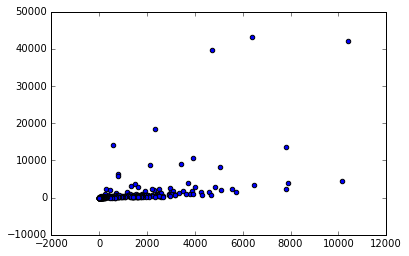

In [4]:
plt.scatter(interesting_columns.IN_0600_0930, interesting_columns.OUT_0600_0930)

In [5]:
interesting_columns[interesting_columns.IN_0600_0930 > 9000]

,IN_0600_0930,OUT_0600_0930
STATION,,
Central,10390,42070
Bondi Junction,10150,4350


In [6]:
import sklearn.cluster

In [11]:
kmeans_clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=2)

In [13]:
two_clustering = kmeans_clusterer.fit_predict(interesting_columns)

In [14]:
rainbow = np.array(['red','green','blue','orange','purple','teal','magenta','cyan'])

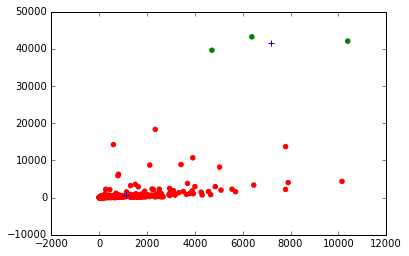

In [17]:
plt.scatter(interesting_columns.IN_0600_0930, interesting_columns.OUT_0600_0930,
            color=rainbow[two_clustering])
plt.scatter(kmeans_clusterer.cluster_centers_[:,0],
           kmeans_clusterer.cluster_centers_[:,1],
           marker='+', s=30)

In [18]:
two_cluster_cluster_centres = kmeans_clusterer.cluster_centers_

In [19]:
two_cluster_cluster_centres

array([[  1117.40983607,    732.03278689],
       [  7160.        ,  41633.33333333]])

In [20]:
cluster_centers = {}
cluster_membership = {}
for cluster_count in range(3,15):
    km = sklearn.cluster.KMeans(init='k-means++', n_clusters=cluster_count)
    cluster_membership[cluster_count] = km.fit_predict(interesting_columns)
    cluster_centers[cluster_count] = km.cluster_centers_

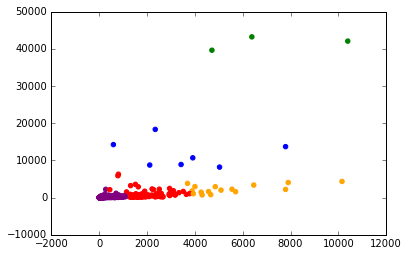

In [26]:
plt.scatter(interesting_columns.IN_0600_0930, interesting_columns.OUT_0600_0930,
            color=rainbow[cluster_membership[5]])

In [27]:
trains2014['eight_cluster_membership'] = rainbow[cluster_membership[5]]

In [28]:
trains2014.eight_cluster_membership

STATION
Central                      green
Town Hall                    green
Wynyard                      green
Parramatta                    blue
North Sydney                  blue
Redfern                       blue
Chatswood                     blue
Bondi Junction              orange
Strathfield                 orange
Circular Quay                 blue
Martin Place                  blue
Hurstville                  orange
St Leonards                   blue
Blacktown                   orange
Burwood                     orange
Kings Cross                 orange
Hornsby                     orange
Ashfield                    orange
Kogarah                     orange
Lidcombe                    orange
Auburn                      orange
Museum                         red
Epping                      orange
Macquarie University           red
St James                       red
Rockdale                    orange
Cabramatta                     red
Bankstown                      red
Liverpool   

In [29]:
import sklearn.metrics

In [30]:
two_cluster_sillhouete_score = sklearn.metrics.silhouette_score(interesting_columns,
                                                               two_clustering)

In [31]:
two_cluster_sillhouete_score

0.9457809055255304

In [35]:
s = {}
for cluster_count in range(3,15):
    s[cluster_count] = sklearn.metrics.silhouette_score(interesting_columns,
                                        cluster_membership[cluster_count])
    print cluster_count, s[cluster_count]

3 0.824303583537
4 0.665944102122
5 0.610944074459
6 0.622049677055
7 0.614237341503
8 0.631686101816
9 0.630553211589
10 0.589633459731
11 0.586269285397
12 0.631475900417
13 0.601117329688
14 0.590591601897


In [37]:
s[2] = two_cluster_sillhouete_score

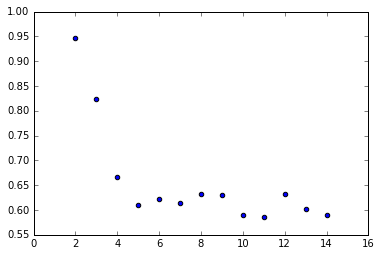

In [38]:
plt.scatter(s.keys(), s.values())
#Accuracy of number of clustering (2,3,4, etc)
# looks like we can get better clustering with the 8th or 9th clusters